In [50]:
import pandas as pd; import numpy as np
# import plotly
# import plotly.plotly as py
# import plotly.figure_factory as ff
# %matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; seaborn.set()
import re

In [56]:
pd.options.display.max_rows = 999

In [63]:
df = pd.read_json('internships.jsonl', lines=True, dtype=False, convert_dates=False)

['ABVP_FT',
 'ABVP_PT',
 'ABVT_FT',
 'ABVT_PT',
 'ACLAM_FT',
 'ACLAM_PT',
 'ACPV_FT',
 'ACPV_PT',
 'ACT_FT',
 'ACT_PT',
 'ACVAA_FT',
 'ACVAA_PT',
 'ACVB_FT',
 'ACVB_PT',
 'ACVCP_FT',
 'ACVCP_PT',
 'ACVD_FT',
 'ACVD_PT',
 'ACVECC_FT',
 'ACVECC_PT',
 'ACVIM_CARD_FT',
 'ACVIM_CARD_PT',
 'ACVIM_INTMET_FT',
 'ACVIM_INTMET_PT',
 'ACVIM_LA_FT',
 'ACVIM_LA_PT',
 'ACVIM_NEUR_FT',
 'ACVIM_NEUR_PT',
 'ACVIM_ONC_FT',
 'ACVIM_ONC_PT',
 'ACVM_FT',
 'ACVM_PT',
 'ACVN_FT',
 'ACVN_PT',
 'ACVO_FT',
 'ACVO_PT',
 'ACVPM_FT',
 'ACVPM_PT',
 'ACVP_FT',
 'ACVP_PT',
 'ACVR_FT',
 'ACVR_ONC_FT',
 'ACVR_ONC_PT',
 'ACVR_PT',
 'ACVSMR_FT',
 'ACVSMR_PT',
 'ACVS_FT',
 'ACVS_PT',
 'ACZM_FT',
 'ACZM_PT',
 'AVDC_FT',
 'AVDC_PT',
 'address',
 'arthroscopy',
 'avg_daily_ER_cases',
 'avg_daily_cases',
 'avg_daily_inpatient_cases',
 'avg_daily_outpatient_cases',
 'avg_daily_surgeries',
 'avg_num_interns_completed_past_5_years',
 'avg_num_interns_started_past_5_years',
 'basic_clinical_laboratory_equipment',
 'blood_gas_anal

In [70]:
df.loc[68, 'name'] = "MedVet Medical & Cancer Centers for Pets (Akron)"

In [73]:
df.loc[69, 'name'] = "MedVet Medical & Cancer Centers for Pets (Chicago)"

In [76]:
df.loc[34, 'total_annual_cases'] = "10000-15000"

In [78]:
# Get rid of commas in total_annual_cases and ">" (e.g. > 20,000)
df['total_annual_cases'] = df['total_annual_cases'].str.replace(',', '')
df['total_annual_cases'] = df['total_annual_cases'].str.replace('>', '')
df['avg_daily_cases'] = df['avg_daily_cases'].str.replace('+', '')
df['avg_daily_ER_cases'] = df['avg_daily_ER_cases'].str.replace('+', '')

In [80]:
# Define function to convert range (e.g. 10000-15000) to one value the average of the two values
def range_to_mean(range_str):
    range_str = range_str.replace(" ", "")
    match = re.search('(\d+)-(\d+)', range_str)
    if match:
        lower = match.group(1)
        upper = match.group(2)
        average = (float(lower)+float(upper))/2
        print(range_str)
        return average
    else:
        return float(range_str)

In [81]:
total_annual_cases_adj = df['total_annual_cases'].apply(range_to_mean)

10000-15000
36000-40000


In [82]:
df.insert(2, 'total_annual_cases_adj', total_annual_cases_adj)

In [85]:
# Adjust average daily cases
avg_daily_cases_adj = df['avg_daily_cases'].apply(range_to_mean)
df.insert(4, 'avg_daily_cases_adj', avg_daily_cases_adj)

8-12
30-40
30-50
60-90
120-160
20-50
40-42
30-45
40-65
80-100
20-25
15-25
80-100
30-35
125-150
90-100
40-50
45-60
95-110
30-35
90-110
15-30
80-120
40-50


In [86]:
# Adjust average daily outpatient cases
avg_daily_outpatient_cases_adj = df['avg_daily_outpatient_cases'].apply(range_to_mean)
df.insert(6, 'avg_daily_outpatient_cases_adj', avg_daily_outpatient_cases_adj)

10-12
25-35
20-40
50-70
85-115
20-30
20-30
20-40
40-50
15-20
10-30
10-15
60-80
25-30
75-80
25-30
20-30
30-35
80-90
20-35
40-50
10-20
40-60
25-35


In [87]:
# Adjust average daily inpatient cases
avg_daily_inpatient_cases_adj = df['avg_daily_inpatient_cases'].apply(range_to_mean)
df.insert(8, 'avg_daily_inpatient_cases_adj', avg_daily_inpatient_cases_adj)

10-12
15-30
15-20
25-65
7-20
8-15
10-30
50-60
10-15
5-15
10-15
20-40
5-8
55-60
10-20
8-15
15-20
12-15
8-12
10-15
10-30
30-45
7-15
20-40
15-25


In [88]:
# Adjust average daily surgeries
avg_daily_surgeries_adj = df['avg_daily_surgeries'].apply(range_to_mean)
df.insert(10, 'avg_daily_surgeries_adj', avg_daily_surgeries_adj)

6-10
4-9
7-9
2-6
5-12
3-9
10-15
6-8
8-15
4-9
15-20
1-3
3-5
3-5
3-5
3-4
3-5
5-8
10-20
2-5
15-20
6-8
10-16
3-5
5-10
3-4
3-4
4-8/
4-7
8-10
2-4
5-6
3-4
8-12
2-5
3-6
20-30
6-10


In [89]:
# Adjust average daily ER cases
avg_daily_ER_cases_adj = df['avg_daily_ER_cases'].apply(range_to_mean)
df.insert(12, 'avg_daily_ER_cases_adj', avg_daily_ER_cases_adj)

15-20
5-15
10-15
20-25
15-30
10-25
30-40
30-34
10-20
15-30
4-6
15-20
20-30
15-30
25-40
30-40
25-35
15-20
9-20
15-20
20-25
25-35
20-25
30-40
7-20
15-25


In [96]:
# Reorder the columns
caseload_df = df[['name', 'total_annual_cases_adj', 'avg_daily_cases_adj', 'avg_daily_outpatient_cases_adj', 'avg_daily_inpatient_cases_adj','avg_daily_surgeries_adj', 'avg_daily_ER_cases_adj']]
caseload_df

,name,total_annual_cases_adj,avg_daily_cases_adj,avg_daily_outpatient_cases_adj,avg_daily_inpatient_cases_adj,avg_daily_surgeries_adj,avg_daily_ER_cases_adj
0,Arbutus West Animal Clinic,1500.0,10.00,11.0,1.0,1.0,0.1
1,Animal Medical Hospital,36500.0,100.00,80.0,8.0,5.0,24.0
2,The Animal Medical Center,51000.0,145.00,125.0,50.0,10.0,45.0
3,Animal Emergency and Referral Center of Minnesota,16104.0,43.00,28.0,15.0,4.0,25.0
4,Angell Animal Medical Center,77629.0,212.00,153.0,59.0,20.0,62.0
5,Affiliated Veterinary Specialists,12000.0,40.00,35.0,25.0,8.0,5.0
6,Advanced Veterinary Specialists,12045.0,33.00,20.0,15.0,5.0,10.0
7,BluePearl Veterinary Partners DC Metro,17000.0,40.00,32.0,8.0,3.0,14.0
8,Bluegrass Veterinary Specialists + Animal Emer...,15000.0,35.00,20.0,11.0,3.0,17.5
9,Avets,15354.0,42.00,35.0,7.0,2.0,32.0


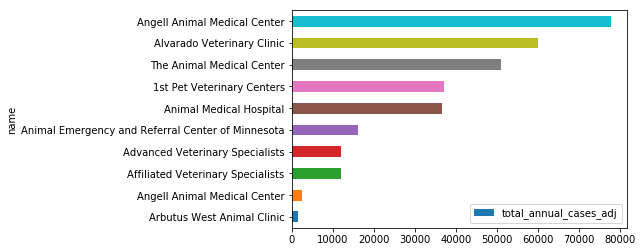

In [11]:
df.sort_values(by='total_annual_cases_adj').plot(kind="barh", x="name", y="total_annual_cases_adj")

In [18]:
df.describe()

,total_annual_cases_adj,avg_daily_cases_adj,avg_daily_outpatient_cases_adj,avg_daily_inpatient_cases_adj,avg_daily_surgeries_adj,avg_daily_ER_cases_adj
count,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000
mean,30617.800000,85.300000,63.70000,23.800000,8.30000,22.710000
std,26056.446661,69.559008,51.97446,20.767496,7.19645,22.518064
min,1500.000000,10.000000,10.00000,0.000000,1.00000,0.100000
25%,12011.250000,34.750000,22.00000,9.750000,4.25000,5.000000
50%,26302.000000,71.500000,47.50000,17.500000,5.50000,17.000000
75%,47500.000000,133.750000,106.25000,40.000000,9.50000,40.000000
max,77629.000000,212.000000,153.00000,59.000000,22.00000,62.000000


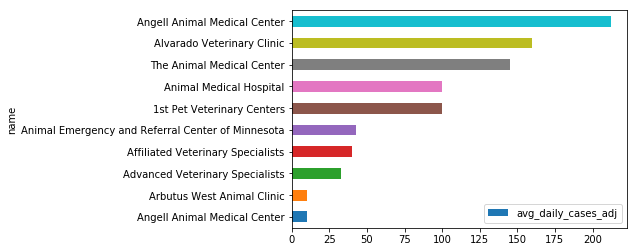

In [22]:
df.sort_values(by='avg_daily_cases_adj').plot(kind="barh", x="name", y="avg_daily_cases_adj")

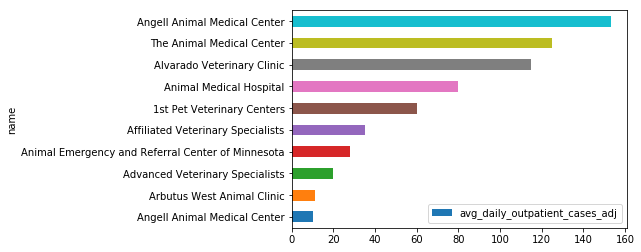

In [24]:
df.sort_values(by='avg_daily_outpatient_cases_adj').plot(kind="barh", x="name", y="avg_daily_outpatient_cases_adj")

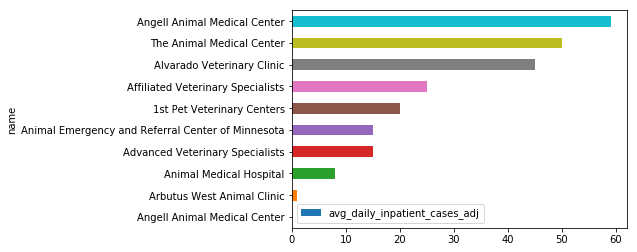

In [25]:
df.sort_values(by='avg_daily_inpatient_cases_adj').plot(kind="barh", x="name", y="avg_daily_inpatient_cases_adj")

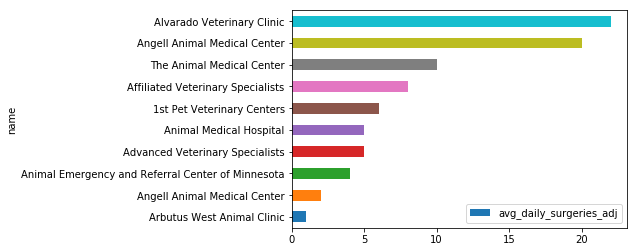

In [28]:
df.sort_values(by='avg_daily_surgeries_adj').plot(kind="barh", x="name", y="avg_daily_surgeries_adj")

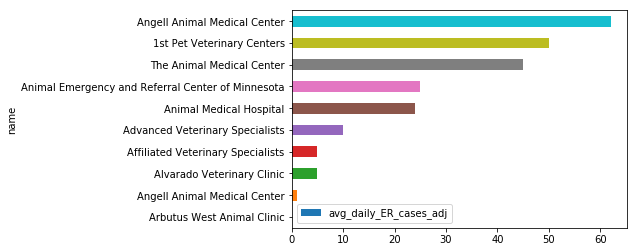

In [29]:
df.sort_values(by='avg_daily_ER_cases_adj').plot(kind="barh", x="name", y="avg_daily_ER_cases_adj")